<a href="https://www.kaggle.com/code/atrisaxena/corruption-perception-index-2021-report?scriptVersionId=105229552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## What is Corruption Perception Index? 
The Corruption Perceptions Index (CPI) is an index which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys."The CPI generally defines corruption as an "abuse of entrusted power for private gain". The index is published annually by the non-governmental organisation Transparency International since 1995.

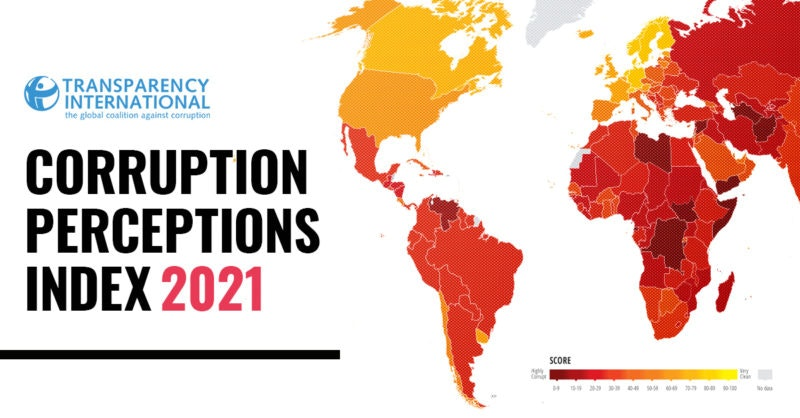

## Importing Libraries

In [1]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 908 kB/s            


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

## Reading files: 

In [3]:
Regional_data = pd.ExcelFile("../input/global-corruption-index-2021/CPI2021_RegionalTables.xlsx" )

In [4]:
#reading CPI Time series to find Rank changed since 2020
CPI_time_series = pd.read_excel("../input/global-corruption-index-2021/CPI2021_GlobalResultsTrends.xlsx", sheet_name="CPI Timeseries 2012 - 2021")
CPI_time_series = pd.DataFrame(CPI_time_series.loc[2:].values.tolist(), columns =CPI_time_series.loc[1])
CPI_time_series.head()

1,Country / Territory,ISO3,Region,CPI score 2021,Rank 2021,Sources 2021,Standard error 2021,CPI score 2020,Rank 2020,Sources 2020,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,Denmark,DNK,WE/EU,88.0,1.0,8.0,1.850507,88.0,1.0,8.0,...,2.16,92.0,7.0,2.04,91.0,7.0,2.2,90.0,7.0,2.0
1,New Zealand,NZL,AP,88.0,1.0,8.0,1.427644,88.0,1.0,8.0,...,2.32,91.0,7.0,2.28,91.0,7.0,2.3,90.0,7.0,2.2
2,Finland,FIN,WE/EU,88.0,1.0,8.0,1.248280,85.0,3.0,8.0,...,1.77,89.0,7.0,2.05,89.0,7.0,1.7,90.0,7.0,3.0
3,Singapore,SGP,AP,85.0,4.0,9.0,1.159654,85.0,3.0,9.0,...,2.02,84.0,8.0,1.75,86.0,9.0,2.3,87.0,9.0,2.1
4,Sweden,SWE,WE/EU,85.0,4.0,8.0,1.239412,85.0,3.0,8.0,...,1.71,87.0,7.0,3.41,89.0,7.0,2.3,88.0,7.0,1.9


In [5]:
#Rank Changed by Country
CPI_time_series["RankChange2021"] = CPI_time_series['Rank 2020'] - CPI_time_series['Rank 2021']
CPI_time_series['RankChange2021'] = CPI_time_series['RankChange2021'].fillna(0)
CPI_time_series[['Country / Territory','RankChange2021']][:10]


1,Country / Territory,RankChange2021
0,Denmark,0.0
1,New Zealand,0.0
2,Finland,2.0
3,Singapore,-1.0
4,Sweden,-1.0
5,Norway,3.0
6,Switzerland,-4.0
7,Netherlands,0.0
8,Luxembourg,0.0
9,Germany,-1.0


## Converting excel data to pandas Data frame

In [6]:
regional_df = pd.DataFrame()
for sheet in Regional_data.sheet_names: 
    data = pd.read_excel("../input/global-corruption-index-2021/CPI2021_RegionalTables.xlsx", sheet_name =sheet )
    df = pd.DataFrame(data.loc[2:].values.tolist(), columns =data.loc[1])
    regional_df = pd.concat([regional_df, df])

In [7]:
regional_df.head()

1,Country / Territory,ISO3,Region,CPI score 2021,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Freedom House Nations in Transit,Global Insights Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index,NaN
0,Denmark,DNK,WE/EU,88,1,1.850507,8,84.95592,91.04408,NaN,...,NaN,83,93.0,NaN,100.0,79.0,NaN,78.0,87.0,NaN
1,Finland,FIN,WE/EU,88,1,1.248280,8,85.94658,90.05342,NaN,...,NaN,83,94.0,NaN,93.0,77.0,NaN,91.0,87.0,NaN
2,New Zealand,NZL,AP,88,1,1.427644,8,85.65153,90.34847,NaN,...,NaN,83,91.0,NaN,93.0,78.0,NaN,85.0,83.0,NaN
3,Norway,NOR,WE/EU,85,4,1.072085,7,83.23642,86.76358,NaN,...,NaN,83,81.0,NaN,85.0,78.0,NaN,NaN,87.0,NaN
4,Singapore,SGP,AP,85,4,1.159654,9,83.09237,86.90763,NaN,...,NaN,83,87.0,91.0,85.0,78.0,NaN,91.0,84.0,NaN


In [8]:
#unique values
regional_df = regional_df.drop_duplicates(subset=['Country / Territory'])

In [9]:
#Appending Rank Changed to the regional_df by locating country
regional_df['Rank Changed'] = 0

for country, rank_changed in np.array(CPI_time_series[['Country / Territory','RankChange2021']]): 
    regional_df.loc[regional_df[regional_df['Country / Territory'] == country].index,'Rank Changed'] = int(rank_changed)
    
regional_df.head()

1,Country / Territory,ISO3,Region,CPI score 2021,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Global Insights Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index,NaN,Rank Changed
0,Denmark,DNK,WE/EU,88,1,1.850507,8,84.95592,91.04408,NaN,...,83,93.0,NaN,100.0,79.0,NaN,78.0,87.0,NaN,0
1,Finland,FIN,WE/EU,88,1,1.248280,8,85.94658,90.05342,NaN,...,83,94.0,NaN,93.0,77.0,NaN,91.0,87.0,NaN,2
2,New Zealand,NZL,AP,88,1,1.427644,8,85.65153,90.34847,NaN,...,83,91.0,NaN,93.0,78.0,NaN,85.0,83.0,NaN,0
3,Norway,NOR,WE/EU,85,4,1.072085,7,83.23642,86.76358,NaN,...,83,81.0,NaN,85.0,78.0,NaN,NaN,87.0,NaN,3
4,Singapore,SGP,AP,85,4,1.159654,9,83.09237,86.90763,NaN,...,83,87.0,91.0,85.0,78.0,NaN,91.0,84.0,NaN,-1


## Let's see some plots

In [10]:
!wget https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/5-watercolor-map-of-the-world-map-michael-tompsett.jpg -d map.jpg

DEBUG output created by Wget 1.20.3 on linux-gnu.

Reading HSTS entries from /root/.wget-hsts
URI encoding = ‘UTF-8’
Converted file name '5-watercolor-map-of-the-world-map-michael-tompsett.jpg' (UTF-8) -> '5-watercolor-map-of-the-world-map-michael-tompsett.jpg' (UTF-8)
--2022-09-08 17:52:06--  https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/5-watercolor-map-of-the-world-map-michael-tompsett.jpg
Resolving images.fineartamerica.com (images.fineartamerica.com)... 99.86.38.81, 99.86.38.45, 99.86.38.64, ...
Caching images.fineartamerica.com => 99.86.38.81 99.86.38.45 99.86.38.64 99.86.38.84 2600:9000:2164:ea00:d:8a0c:6440:93a1 2600:9000:2164:5400:d:8a0c:6440:93a1 2600:9000:2164:1c00:d:8a0c:6440:93a1 2600:9000:2164:9600:d:8a0c:6440:93a1 2600:9000:2164:5e00:d:8a0c:6440:93a1 2600:9000:2164:3600:d:8a0c:6440:93a1 2600:9000:2164:9e00:d:8a0c:6440:93a1 2600:9000:2164:1800:d:8a0c:6440:93a1
Connecting to images.fineartamerica.com (images.fineartamerica.com)|99.86.38.81|:443... co

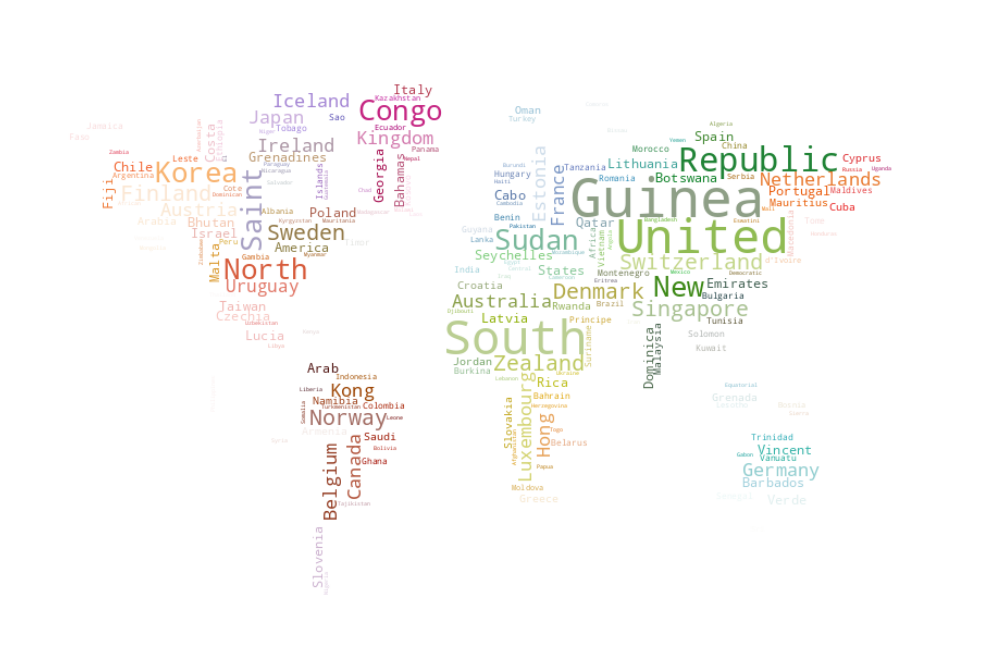

In [11]:
text = " ".join(regional_df['Country / Territory'].values)
mask = np.array(Image.open("./5-watercolor-map-of-the-world-map-michael-tompsett.jpg"))

wordcloud_country = WordCloud( background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[18,12])
plt.imshow(wordcloud_country.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

## Top 50% countries with Corruption

In [12]:
import plotly.graph_objs as go

fig = px.bar(regional_df[: len(regional_df)//2], x='Country / Territory', y='CPI score 2021',
             title="Top 50 % Countries CPI in 2021",
             hover_data=['Rank', 'Rank Changed'], color='CPI score 2021',
              height=500, width=1100)
fig.show()

My country India is at Rank of 84 and Rank gained by 1 since 2020 Rank.

Check your Country. 

### Rest 50% countries with Corruption

In [13]:
fig = px.bar(regional_df[len(regional_df)//2: ], x='Country / Territory', y='CPI score 2021',
             title= "Rest 50 % CPI in 2021 ",
             hover_data=['Rank','Rank Changed'], color='CPI score 2021'
             , height=500, width = 1100)
fig.show()

## World Heat Map CPI Score 2021

In [14]:
fig = px.choropleth(regional_df, locations="Country / Territory", locationmode='country names', color="CPI score 2021",
                   hover_data=['Rank', 'Rank Changed'] )

In [15]:
fig.update_layout(title_text="Heatmap of CPI for Countries in 2021", title_font_size=24,
                  height=800, width=1000, yaxis_title="GDP($)", xaxis_title="Country",
                  title_y=0.85, title_x=0.45)

fig.show()

### References: 

- https://www.transparency.org/en/
- https://en.wikipedia.org/wiki/Corruption_Perceptions_Index 
- fineartamerica.com